# Assignment: Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений `n` (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

**Обратите внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## Экспоненциальное распределение

Сгенерируем выборку экспоненциально распределённой случайной величины с параметром $\lambda=1.5$:

In [304]:
p_lambda = 1.5

expon = sts.expon(scale=1/p_lambda)

График функции распределения:

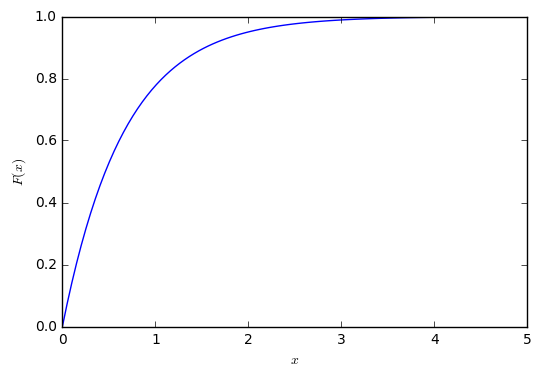

In [305]:
x = np.linspace(0,5,100)
cdf = expon.cdf(x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Сгенерируем выборку объема 1000:

In [306]:
values = expon.rvs(size=1000)

Гистограмма и теоретическая плотность вероятности будут иметь вид:

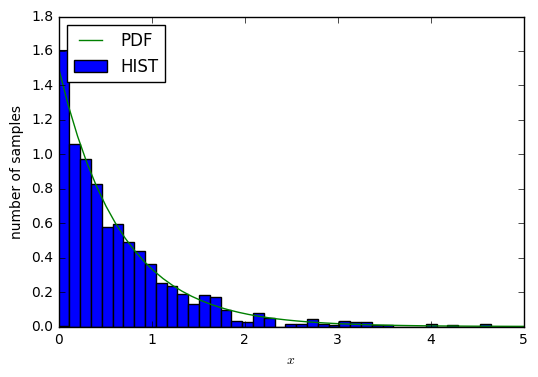

In [314]:
# Инициализируем массив
x = np.linspace(0,5)

# Рисуем гистограмму
plt.hist(values, bins=40, normed=True, label='HIST')

# Рисуем функцию распределения плотности
pdf = expon.pdf(x)
plt.plot(x, pdf, label='PDF')

plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Построим гистограммы для разного количества интервалов, а также теоретическую плотность распределения на каждом из них:

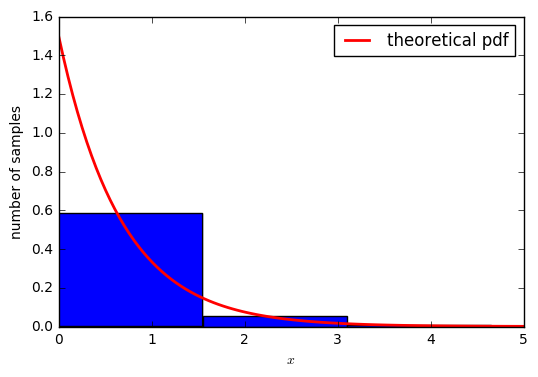

In [315]:
plt.hist(values, bins=3, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

x = np.linspace(0,5,100)
pdf = expon.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='red', linewidth=2.0)
plt.legend()

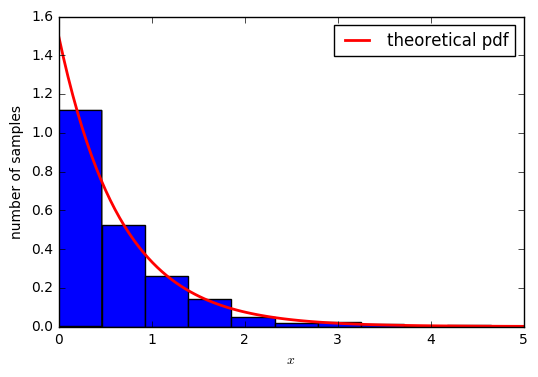

In [316]:
plt.hist(values, bins=10, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

x = np.linspace(0,5,100)
pdf = expon.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='red', linewidth=2.0)
plt.legend()

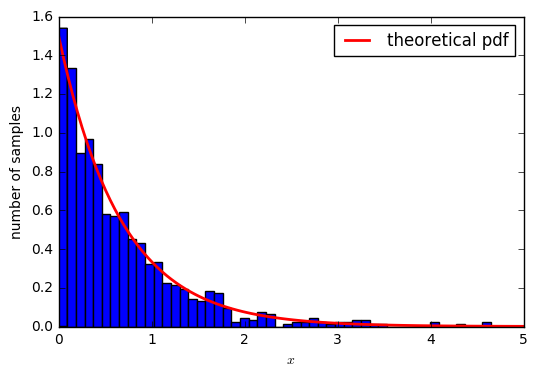

In [317]:
plt.hist(values, bins=50, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

x = np.linspace(0,5,100)
pdf = expon.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='red', linewidth=2.0)
plt.legend()

Как видим, последняя гистограмма с кличеством интервалов, равным 50, наиболее приближена к теоретической плотности распределения

Сгенерируем 1000 выборок объема n = 5, 20, 100 и посчитаем их выборочные средние. При n = 5:

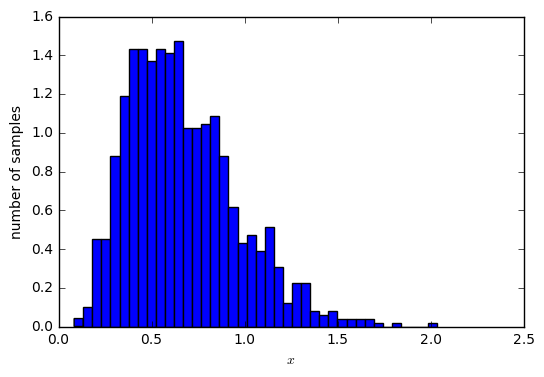

In [318]:
list5 = []

for i in range(1000):
    values = expon.rvs(size=5)
    md = sum(values)/5
    list5.append(md)
    
plt.hist(list5, bins=40, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

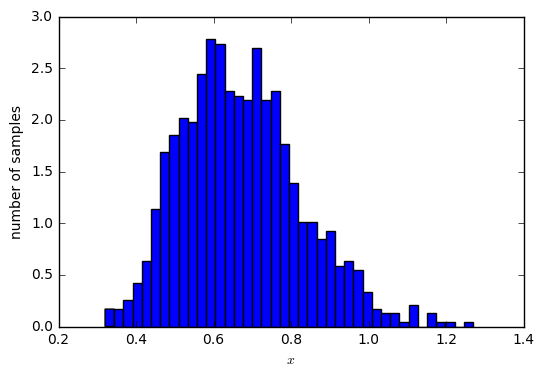

In [319]:
list20 = []

for i in range(1000):
    values = expon.rvs(size=20)
    md = sum(values)/20
    list20.append(md)
    
plt.hist(list20, bins=40, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

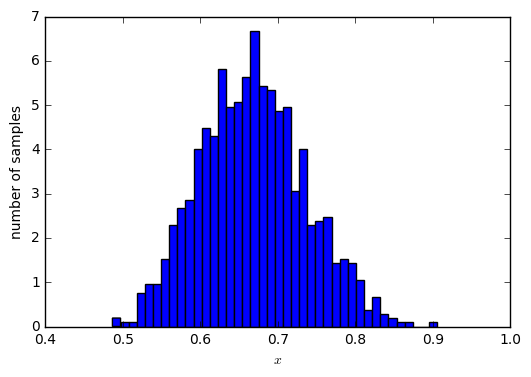

In [320]:
list100 = []

for i in range(1000):
    values = expon.rvs(size=100)
    md = sum(values)/100
    list100.append(md)
    
plt.hist(list100, bins=40, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Рассчитаем теоретические среднее и дисперсию случайной величины. Т.к. $ \lambda $ = 1.5, мат. ожидание $ \lambda^{-1} $, а дисперсия - $ \lambda^{-2}$, построим плотности соответствующего экспоненциального распределения. При n = 5:

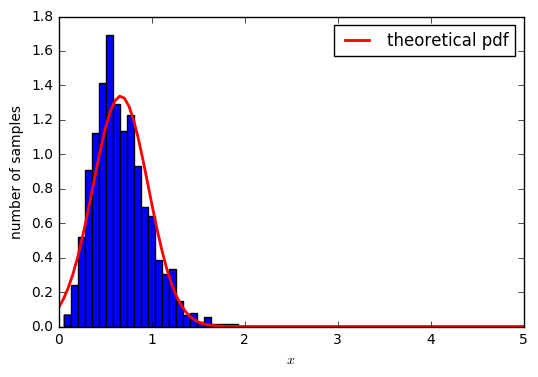

In [321]:
list5 = []

for i in range(1000):
    values = expon.rvs(size=5)
    md = sum(values)/5
    list5.append(md)
    
plt.hist(list5, bins='auto', normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

norm_rv = sts.norm(1/p_lambda, math.sqrt((1/p_lambda**2)/5))
np.linspace(min(list5), max(list5), 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='red', linewidth=2.0)
plt.legend()

При n = 20:

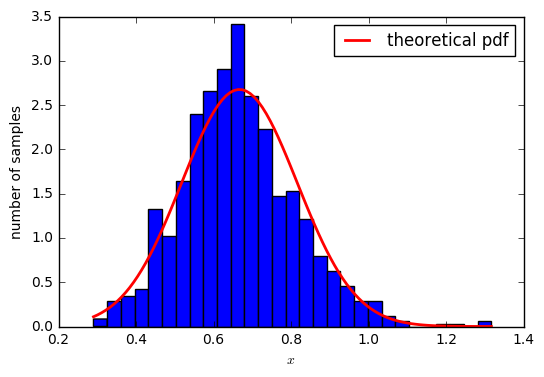

In [322]:
list20 = []

for i in range(1000):
    values = expon.rvs(size=20)
    md = sum(values)/20
    list20.append(md)
    
plt.hist(list20, bins='auto', normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

norm_rv = sts.norm(1/p_lambda, math.sqrt((1/p_lambda**2)/20))
x = np.linspace(min(list20), max(list20), 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='red', linewidth=2.0)
plt.legend()

При n = 100:

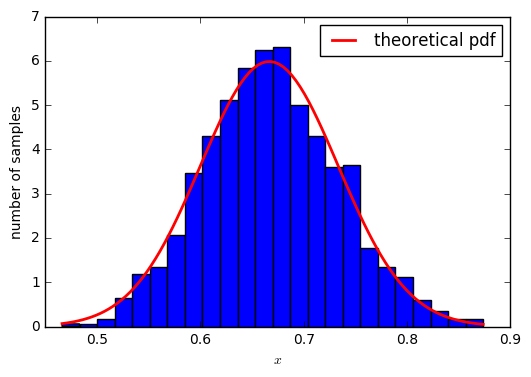

In [323]:
list100 = []

for i in range(1000):
    values = expon.rvs(size=100)
    md = sum(values)/100
    list100.append(md)
    
plt.hist(list100, bins='auto', normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

norm_rv = sts.norm(1/p_lambda, math.sqrt((1/p_lambda**2)/100))
x = np.linspace(min(list100), max(list100), 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=1, color='red', linewidth=2.0)
plt.legend()

Как видим, чем больше выборка, тем точнее гистограмма повторяет теоретическую плотность нормального распределения.
Следовательно, чем больше выборка, тем выше точность аппроксимации распределения выборочных средних.